# Simulace ystému druhého řádu

## Příklad

Simulujte kmitavý systém
$$ y^{''}(t)+2 \cdot \eta \cdot \Omega_0 \cdot y^{'}(t)+\Omega_0^2\cdot y(t)= b_0 \cdot u(t)+b_1 \cdot u^{'} (t)$$

Převedení na stavovou formulaci, tj. soustavu $n$ diferenciálních rovnic prvního řádu  $\textbf{x}'(t)=\textbf{f}\left(\textbf{x}(t),u(t)\right)$

Zde metodou postupné integrace:

$$
\begin{bmatrix}
&x_1^{'}(t)&\\
&x_2^{'}(t)&
\end{bmatrix}
=
\begin{bmatrix}
f_1\big(\textbf{x}(t),u(t)\big)\\
f_2\big(\textbf{x}(t),u(t)\big)\\
\end{bmatrix}
=
\begin{bmatrix}
-\Omega_0^2\cdot x_2(t)- b_0 \cdot u(t)\\
-2 \cdot \eta \cdot \Omega_0 \cdot x_2(t)-b_1\cdot u(t)+x_1(t)
\end{bmatrix}
$$

$$y(t)=-x_2(t)$$

In [16]:
import numpy as np
%matplotlib widget
import matplotlib.pyplot as plt
import time
start = time.time()
dt = .05  #[sec]
t = np.arange(0, 10, dt)
N = len(t)  # delka dat

u = np.sin(2 * np.pi / 10 * t)
u = np.sign(u)


from scipy.integrate import odeint
import matplotlib.pyplot as plt

def fdxdt(x, t, u, Omega, eta, b0,
          b1):  # x=[x1 x2 ... xn] vektor hodnot n stavovych velicin
    dx1dt = -Omega0**2 * x[1] - b0 * u
    dx2dt = -2 * eta * Omega0 * x[1] - b1 * u + x[0]
    return (dx1dt, dx2dt)

Omega0 = 10
eta = .1
b0 = Omega0**2
b1 = 0

y_ref = np.zeros(N)
x10 = 0
x20 = 0  # poc. podm

x0 = [x10, x20]

for i in range(0, N - 1):
    tt = [t[i], t[i + 1]]  # [t1 t2]
    x = odeint(fdxdt, x0, t,
               (u[i], Omega0, eta, b0,
                b1))  #returns x=[ [x1(t1) x2(t1)] [x1(t2) x2(t2)]]
    #    x=odeint(fdxdt,x0,tt,args=(u[i],)) # <-- pokud je jen jeden extra argument, musi se tak
    y_ref[i + 1] = -x[1, 1]
    x0 = x[1, :]  # jako nove poc. podm pro dalsi integraci

plt.plot(y_ref)

end = time.time()

print(end - start)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

0.9870028495788574


In [6]:
import numpy as np
%matplotlib widget
import matplotlib.pyplot as plt
import time
start = time.time()
dt = .05  #[sec]
t = np.arange(0, 10, dt)
N = len(t)  # delka dat

u = np.sin(2 * np.pi / 10 * t)
u = np.sign(u)


from scipy.integrate import odeint
import matplotlib.pyplot as plt

def fdxdt(y, t, u, Omega, eta, b0,
          b1):  # x=[x1 x2 ... xn] vektor hodnot n stavovych velicin
    dy1dt = -Omega0**2 * x[1] - b0 * u
    dy2dt = -2 * eta * Omega0 * x[1] - b1 * u + x[0]
    dydt = [dy1dt, dy2dt]
    return dydt

Omega0 = 10
eta = .1
b0 = Omega0**2
b1 = 0

y_ref = np.zeros(N)
y10 = 0
y20 = 0  # poc. podm

y0 = [y10, y20]


sol = odeint(fdxdt, y0, t,
               args=(u[i], Omega0, eta, b0,
                b1))  #returns x=[ [x1(t1) x2(t1)] [x1(t2) x2(t2)]]
#    x=odeint(fdxdt,x0,tt,args=(u[i],)) # <-- pokud je jen jeden extra argument, musi se tak

plt.plot(x[0])

plt.plot(x[1])

end = time.time()

print(end - start)

RuntimeError: The array return by func must be one-dimensional, but got ndim=2.

In [8]:
#theta''(t) + b*theta'(t) + c*sin(theta(t)) = 0


#theta'(t) = omega(t)
#omega'(t) = -b*omega(t) - c*sin(theta(t))



def pend(y, t, b, c):
    theta, omega = y
    dydt = [omega, -b*omega - c*np.sin(theta)]
    return dydt




b = 0.25
c = 5.0


y0 = [np.pi - 0.1, 0.0]


t = np.linspace(0, 10, 101)


from scipy.integrate import odeint
sol = odeint(pend, y0, t, args=(b, c))


import matplotlib.pyplot as plt
plt.plot(t, sol[:, 0], 'b', label='theta(t)')
plt.plot(t, sol[:, 1], 'g', label='omega(t)')
plt.legend(loc='best')
plt.xlabel('t')
plt.grid()
plt.show()



Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

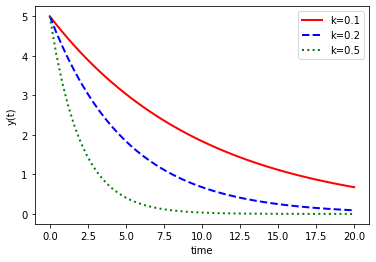

In [1]:
import numpy as np
from scipy.integrate import odeint

%matplotlib inline
import matplotlib.pyplot as plt

# function that returns dy/dt
def model(y,t,k):
    dydt = -k * y
    return dydt

# initial condition
y0 = 5

# time points
t = np.linspace(0,20)

# solve ODEs
k = 0.1
y1 = odeint(model,y0,t,args=(k,))
k = 0.2
y2 = odeint(model,y0,t,args=(k,))
k = 0.5
y3 = odeint(model,y0,t,args=(k,))

# plot results
plt.plot(t,y1,'r-',linewidth=2,label='k=0.1')
plt.plot(t,y2,'b--',linewidth=2,label='k=0.2')
plt.plot(t,y3,'g:',linewidth=2,label='k=0.5')
plt.xlabel('time')
plt.ylabel('y(t)')
plt.legend()
plt.show()